In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Load the data
df = pd.read_csv('/Users/rutvajoshi/Documents/Masters final project/Final-abarth-fiat.csv')

In [3]:
print(df.columns)

Index(['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'Twitter Username',
       'Twitter @ name', 'Twitter User Id', 'Twitter User Location',
       'URL in Bio', 'Twitter Bio', 'User Verified Status',
       'Users Following Count', 'Number users this account is following',
       'Users Number of Likes', 'Users Tweet Count', 'Lists Containing User',
       'Account Created Time', 'Profile Image URL', 'User Default Profile',
       'User Default Profile Image', 'is_english'],
      dtype='object')


In [4]:
df.head()

,Tweet Text,Tweet Datetime,Tweet Id,Twitter Username,Twitter @ name,Twitter User Id,Twitter User Location,URL in Bio,Twitter Bio,User Verified Status,Users Following Count,Number users this account is following,Users Number of Likes,Users Tweet Count,Lists Containing User,Account Created Time,Profile Image URL,User Default Profile,User Default Profile Image,is_english
0,@Naonskdnao1103 @kazzen Check out : Fiat Punto...,2023-06-10 12:54:00+00:00,1667515456415232000,Liez,Lie_Lay_Land,39284803,nowhere /reboot,http://t.co/b1UtQwwQQk,emptiness: isolate + feel /Archi for the neutral,False,250,587,23151,40152,26,2009-05-11 16:33:56+00:00,https://pbs.twimg.com/profile_images/518769800...,False,False,True
1,the virgin wolkswagen killing the beetle (oooh...,2023-06-10 12:31:41+00:00,1667509842259443718,laura,freezydorito,3004020255,hopeless brexit kingdom,https://t.co/2HclLyGdNY,the metaverse demands blood 🍄 swe @ big vr hea...,False,10276,823,227191,139517,153,2015-01-29 10:06:54+00:00,https://pbs.twimg.com/profile_images/164261529...,False,False,True
2,Spring crop of little EVs includes 3 you may w...,2023-06-10 11:53:02+00:00,1667500113030180866,Detroit Free Press,freep,8795772,Detroit,https://t.co/q36hazfqEa,Award-winning local news and analysis from Det...,False,528914,3304,5545,313184,4657,2007-09-10 21:42:21+00:00,https://pbs.twimg.com/profile_images/937704146...,False,False,True
3,Spring crop of little EVs includes 3 you may w...,2023-06-10 11:09:02+00:00,1667489041330196482,Freep Autos,freepautos,17130839,Detroit,http://t.co/gxlPYyTcrh,Latest autos news from Detroit reported by @fr...,False,16001,502,84,20632,432,2008-11-03 14:01:53+00:00,https://pbs.twimg.com/profile_images/936746559...,False,False,True
4,With my unique ideas &amp; inventions trusting...,2023-06-10 10:56:01+00:00,1667485763406110721,Design GURU,oruclarahmet1,1049633325718138880,"Istanbul, Turkey",NaN,"REAL LOVE AND SPORTS, MUSIC MAN, STILL SEEKING...",False,910,4990,44572,41345,2,2018-10-09 12:11:00+00:00,https://pbs.twimg.com/profile_images/159079116...,True,False,True


In [7]:
# Convert 'Tweet Datetime' column to datetime format
df['Tweet Datetime'] = pd.to_datetime(df['Tweet Datetime'])


In [8]:
# Calculate sentiment scores using TextBlob (assuming 'Tweet Text' contains tweet text)
df['Sentiment Score'] = df['Tweet Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [10]:
# Set 'Tweet Datetime' as the index
df.set_index('Tweet Datetime', inplace=True)


In [12]:
# Resample data to daily frequency and calculate daily sentiment mean and tweet count
daily_sentiment = df['Sentiment Score'].resample('D').mean()
daily_tweet_count = df['Tweet Id'].resample('D').count()


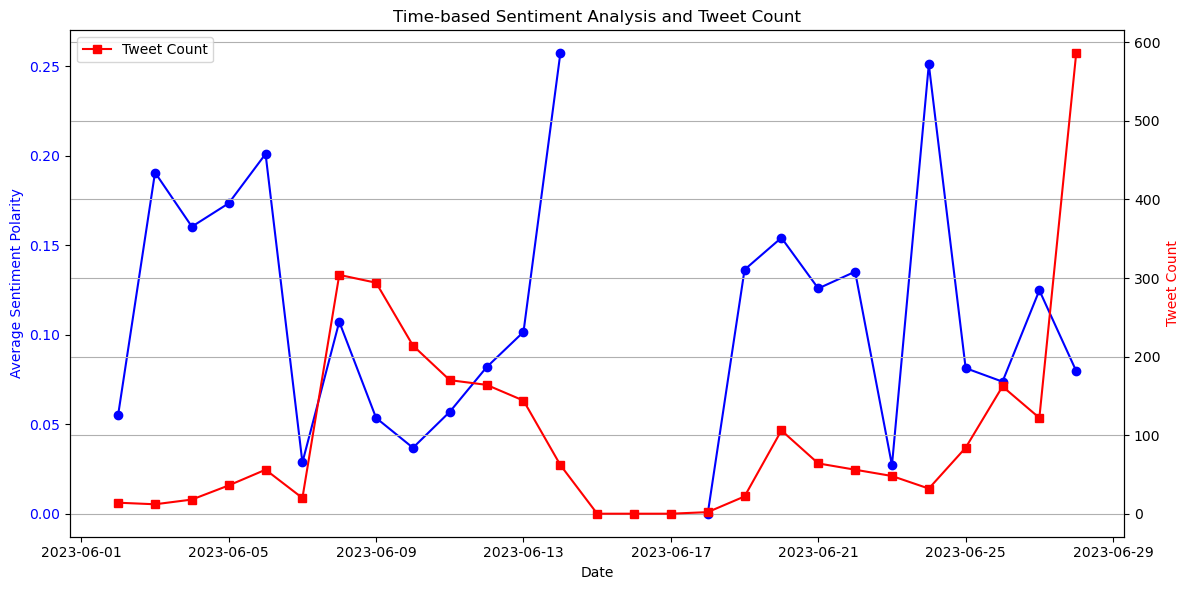

In [13]:
# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot sentiment values on the primary y-axis
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-', color='b', label='Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity', color='b')
plt.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for tweet counts
plt.twinx()
plt.plot(daily_tweet_count.index, daily_tweet_count.values, marker='s', linestyle='-', color='r', label='Tweet Count')
plt.ylabel('Tweet Count', color='r')

# Add title and rotate x-axis labels
plt.title('Time-based Sentiment Analysis and Tweet Count')
plt.xticks(rotation=45)

# Add legends
plt.legend(loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

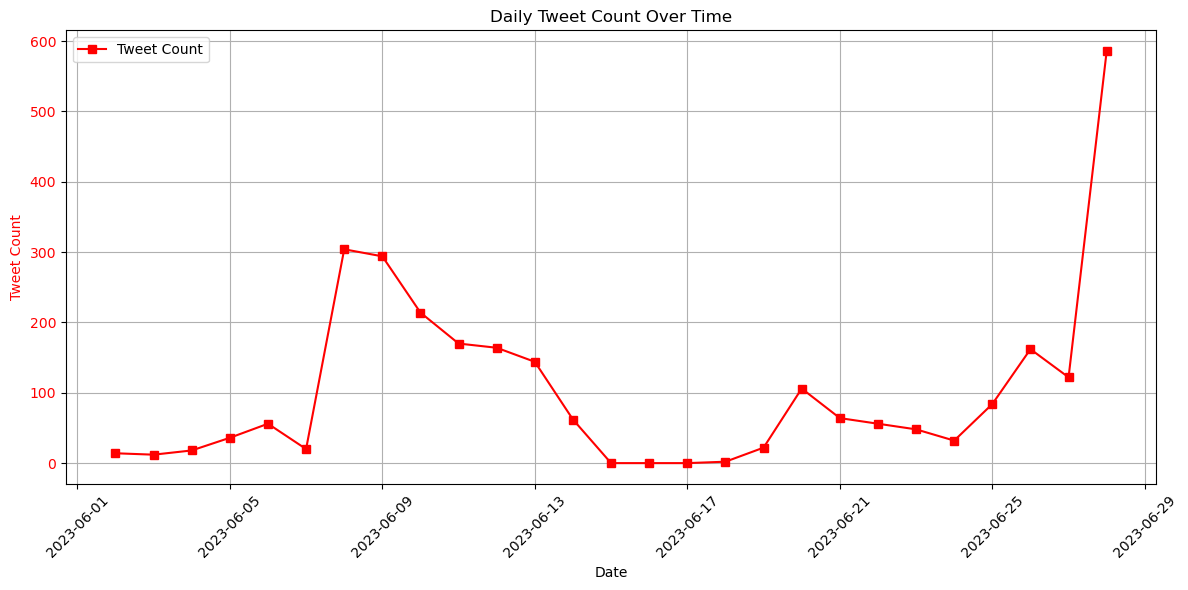

In [14]:
# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot tweet counts
plt.plot(daily_tweet_count.index, daily_tweet_count.values, marker='s', linestyle='-', color='r', label='Tweet Count')
plt.xlabel('Date')
plt.ylabel('Tweet Count', color='r')
plt.tick_params(axis='y', labelcolor='r')

# Add title and rotate x-axis labels
plt.title('Daily Tweet Count Over Time')
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Convert the "Tweet Datetime" column to pandas datetime format
#df["Tweet Datetime"] = pd.to_datetime(df["Tweet Datetime"])


In [5]:
# Calculate summary statistics for numeric columns
summary_stats_numeric = df.describe()

In [6]:
# Calculate summary statistics for non-numeric columns
summary_stats_non_numeric = df.describe(include=[np.object])


/var/folders/s4/b3_xqqqd5zq94jc155st97d80000gn/T/ipykernel_19171/1014532535.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  summary_stats_non_numeric = df.describe(include=[np.object])


In [7]:
# Display the summary statistics
print("Summary Statistics for Numeric Columns:")
print(summary_stats_numeric)


Summary Statistics for Numeric Columns:
           Tweet Id  Twitter User Id  Users Following Count  \
count  2.792000e+03     2.792000e+03           2.792000e+03   
mean   1.670115e+18     6.577498e+17           1.131460e+04   
std    3.074742e+15     6.660782e+17           9.622766e+04   
min    1.664573e+18     8.756410e+05           0.000000e+00   
25%    1.667268e+18     3.137763e+08           1.447500e+02   
50%    1.668642e+18     7.689077e+17           6.055000e+02   
75%    1.673558e+18     1.327665e+18           2.455250e+03   
max    1.674193e+18     1.674023e+18           2.067011e+06   

       Number users this account is following  Users Number of Likes  \
count                             2792.000000            2792.000000   
mean                              1280.850287           28980.535100   
std                               3311.845158           65503.056694   
min                                  0.000000               0.000000   
25%                             

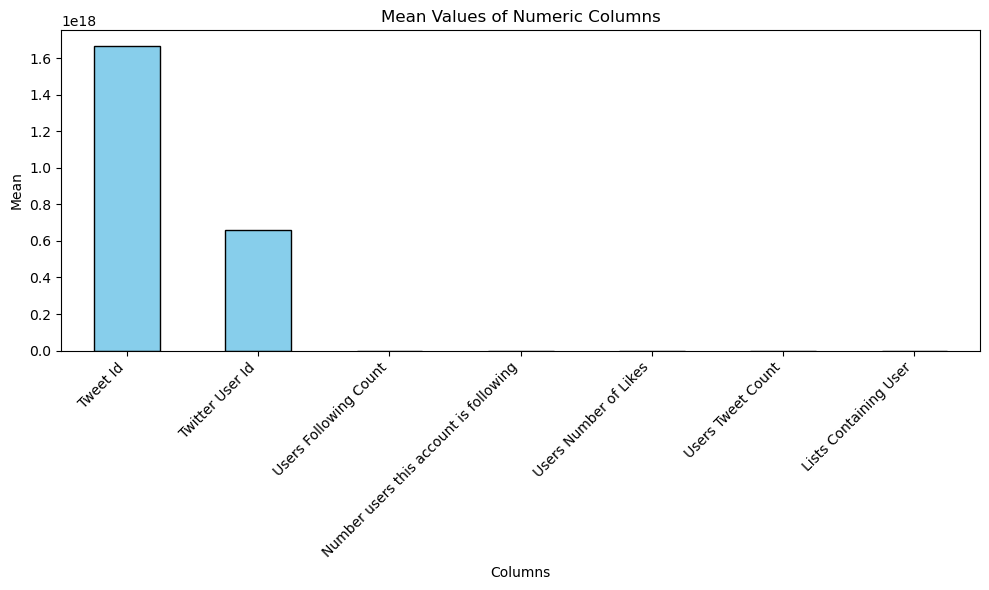

In [8]:
# Plot a bar chart for the mean of numeric columns
mean_values = summary_stats_numeric.loc["mean"]
mean_values.plot(kind="bar", figsize=(10, 6), color="skyblue", edgecolor="black")
plt.title("Mean Values of Numeric Columns")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [9]:
print("\nSummary Statistics for Non-Numeric Columns:")
print(summary_stats_non_numeric)


Summary Statistics for Non-Numeric Columns:
                                               Tweet Text Twitter Username  \
count                                                2792             2792   
unique                                               1252             1034   
top     Right, need to sell at least 8 of my cars. Che...       Mark Elvin   
freq                                                   12               30   

       Twitter @ name Twitter User Location               URL in Bio  \
count            2792                  2016                     1220   
unique           1035                   567                      416   
top           sscmark        United Kingdom  https://t.co/sw1sEVVDPX   
freq               30                    96                       28   

                                              Twitter Bio  \
count                                                2532   
unique                                                925   
top     Self employe

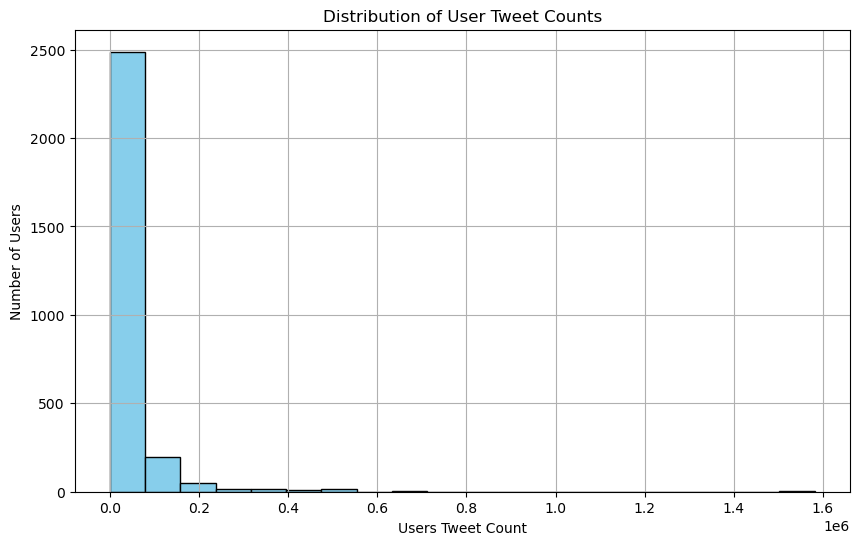

In [10]:
# Plot the distribution of user tweet counts
plt.figure(figsize=(10, 6))
plt.hist(df['Users Tweet Count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Users Tweet Count')
plt.ylabel('Number of Users')
plt.title('Distribution of User Tweet Counts')
plt.grid(True)
plt.show()

In [11]:
# Define a threshold for classifying tweets into "High Likes" and "Low Likes"
likes_threshold = 1000


In [12]:
# Create a new column 'Likes Class' based on the threshold
df['Likes Class'] = df['Users Number of Likes'].apply(lambda x: 'High Likes' if x > likes_threshold else 'Low Likes')


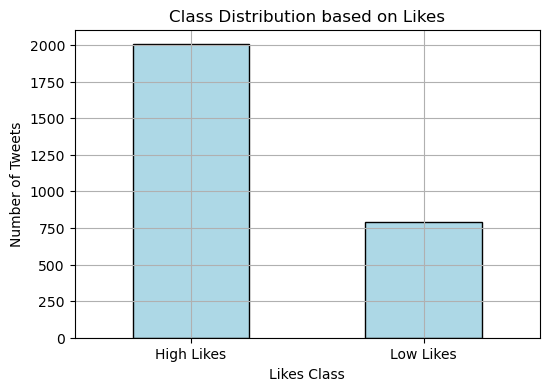

In [13]:
# Plot the class distribution
plt.figure(figsize=(6, 4))
df['Likes Class'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel('Likes Class')
plt.ylabel('Number of Tweets')
plt.title('Class Distribution based on Likes')
plt.grid(True)
plt.show()

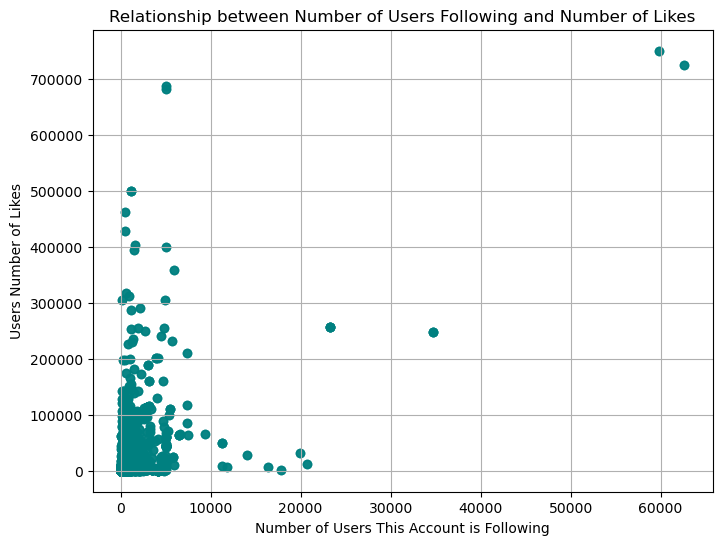

In [14]:
# Scatter plot to visualize the relationship between "Number users this account is following" and "Number of Likes"
plt.figure(figsize=(8, 6))
plt.scatter(df['Number users this account is following'], df['Users Number of Likes'], color='teal', alpha=0.8)
plt.xlabel('Number of Users This Account is Following')
plt.ylabel('Users Number of Likes')
plt.title('Relationship between Number of Users Following and Number of Likes')
plt.grid(True)
plt.show()

In [15]:
# Sort the DataFrame by 'Users Tweet Count' in descending order
df_sorted = df.sort_values(by='Users Tweet Count', ascending=False)


In [16]:
# Get the top 10 Twitter users with the highest tweet counts
top_10_users = df_sorted.head(10)


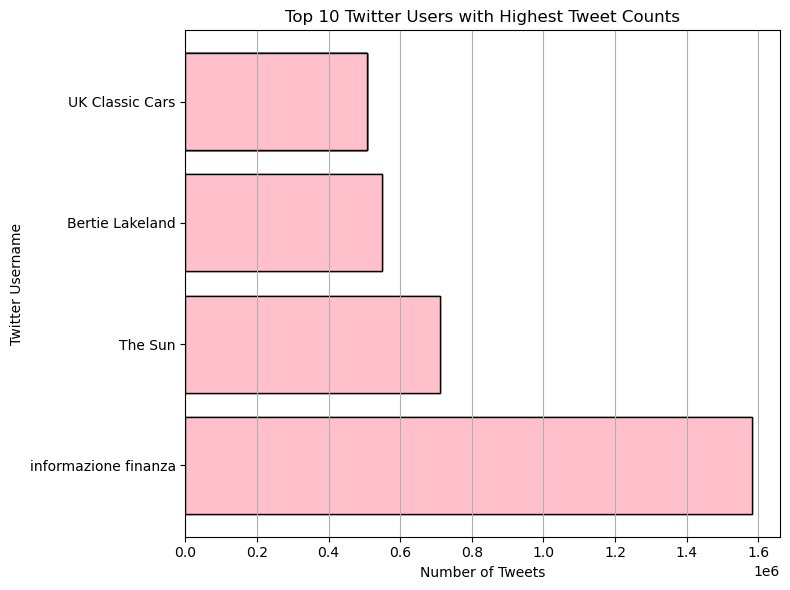

In [17]:
# Create a horizontal bar plot to visualize the top 10 Twitter users
plt.figure(figsize=(8, 6))
plt.barh(top_10_users['Twitter Username'], top_10_users['Users Tweet Count'], color='pink', edgecolor='black')
plt.xlabel('Number of Tweets')
plt.ylabel('Twitter Username')
plt.title('Top 10 Twitter Users with Highest Tweet Counts')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [18]:
pip install textblob pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
from textblob import TextBlob


In [20]:
# Convert 'Tweet Datetime' to datetime format
df['Tweet Datetime'] = pd.to_datetime(df['Tweet Datetime'])


In [21]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [22]:
# Apply sentiment analysis to 'Tweet Text' column
df['Sentiment Polarity'] = df['Tweet Text'].apply(get_sentiment)


In [23]:
# Group tweets by date and calculate average sentiment polarity for each day
daily_sentiment = df.groupby(df['Tweet Datetime'].dt.date)['Sentiment Polarity'].mean()


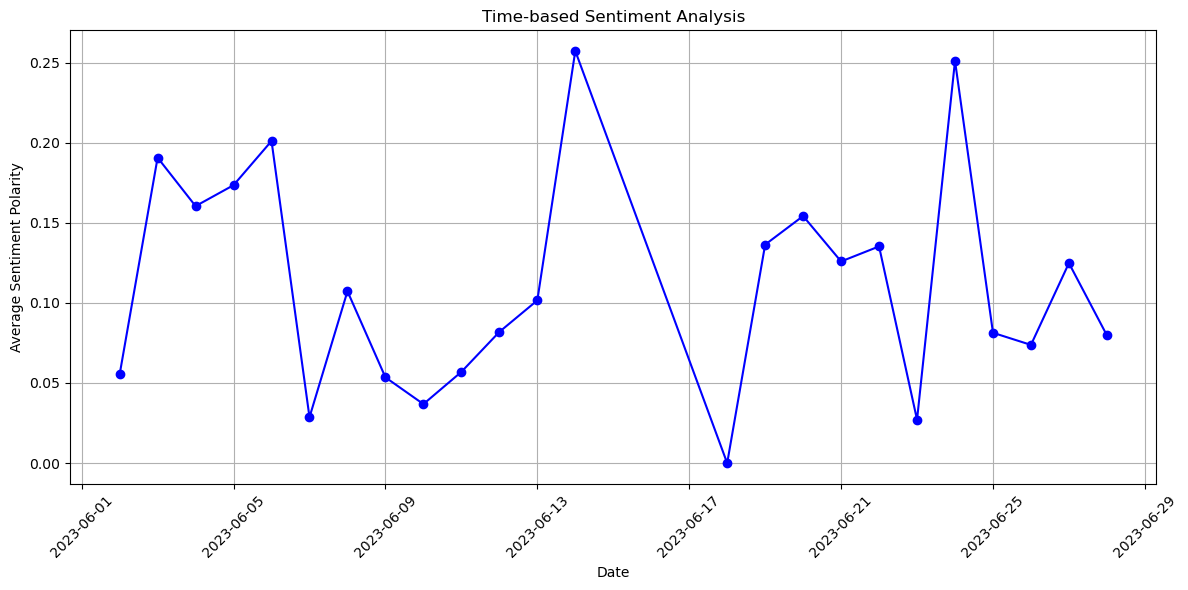

In [24]:
# Plot the sentiment over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.title('Time-based Sentiment Analysis')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Convert 'Tweet Datetime' to datetime format
df['Tweet Datetime'] = pd.to_datetime(df['Tweet Datetime'])


In [26]:
# Extract time zone information from 'Twitter User Location'
df['Time Zone'] = df['Twitter User Location'].str.extract(r'\b([A-Za-z]+)\b')


In [27]:
# Group tweets by time zone and count the number of tweets in each time zone
tweet_activity_by_time_zone = df['Time Zone'].value_counts()


In [28]:
# Sort the time zones by tweet activity in descending order
tweet_activity_by_time_zone = tweet_activity_by_time_zone.sort_values(ascending=False)


In [29]:
# Filter the data to show only the top 15 time zones
top_time_zones = tweet_activity_by_time_zone.head(15)

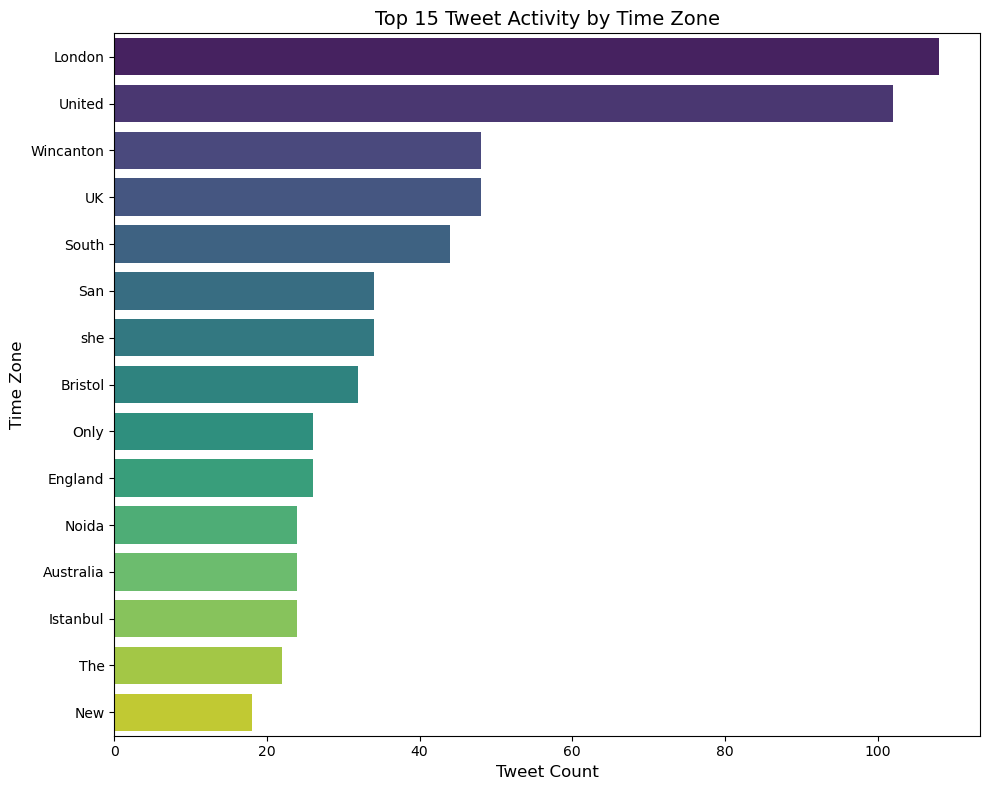

In [30]:
# Plot tweet activity by time zone using a horizontal bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.barplot(x=top_time_zones.values, y=top_time_zones.index, palette='viridis')
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('Time Zone', fontsize=12)
plt.title('Top 15 Tweet Activity by Time Zone', fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
# Convert 'Tweet Datetime' to datetime format
df['Tweet Datetime'] = pd.to_datetime(df['Tweet Datetime'])


In [32]:
# Extract hour and day of the week information from 'Tweet Datetime'
df['Tweet Hour'] = df['Tweet Datetime'].dt.hour
df['Tweet Day'] = df['Tweet Datetime'].dt.day_name()


In [33]:
# Group tweets by hour and count the number of tweets in each hour
tweet_activity_by_hour = df['Tweet Hour'].value_counts().sort_index()


In [34]:
# Group tweets by day of the week and count the number of tweets on each day
tweet_activity_by_day = df['Tweet Day'].value_counts().sort_index()


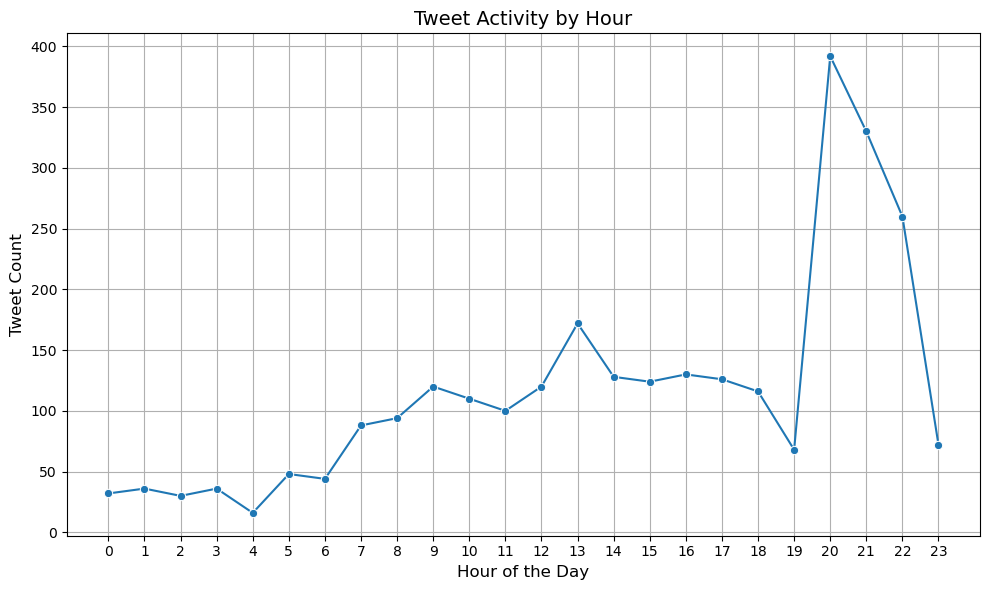

In [35]:
# Plot tweet activity by hour using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=tweet_activity_by_hour.index, y=tweet_activity_by_hour.values, marker='o')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.title('Tweet Activity by Hour', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Specify the order of the days of the week in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [37]:
# Convert the 'Tweet Day' column to a Categorical data type with the specified order
df['Tweet Day'] = pd.Categorical(df['Tweet Day'], categories=day_order, ordered=True)


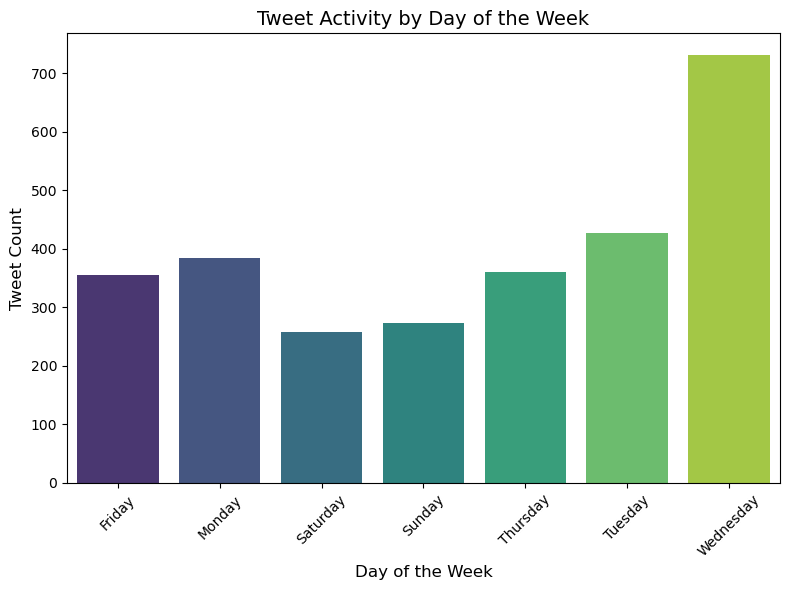

In [38]:
# Plot tweet activity by day of the week using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=tweet_activity_by_day.index, y=tweet_activity_by_day.values, palette='viridis')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.title('Tweet Activity by Day of the Week', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()